# First Name: Kantapong
# Last Name: Wongsanguan

# Import Libraries  

In [46]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import matplotlib.pyplot as plt

# Import Data

In [47]:
bottle = pd.read_csv('Bottle.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)
bottle.head(10);

# Data management 

In [48]:
# The two variables used will be depth and Silicate concentration.
bottle["Depthm"] = pd.to_numeric(bottle["Depthm"])
bottle["SiO3uM"] = pd.to_numeric(bottle["SiO3uM"])

C:\Users\kanta\AppData\Local\Temp\ipykernel_5876\3477212999.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bottle["Depthm"], kde=False);


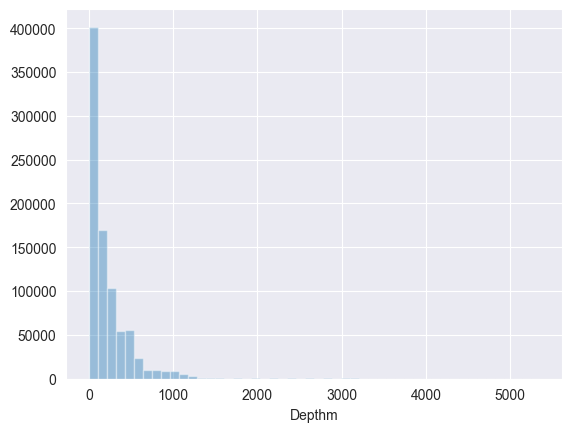

In [49]:
# Initial histogram of depth.
sns.distplot(bottle["Depthm"], kde=False);

C:\Users\kanta\AppData\Local\Temp\ipykernel_5876\208906258.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bottle["SiO3uM"], kde=False);


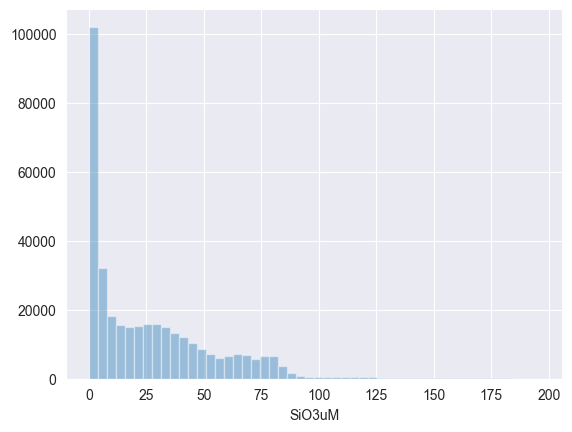

In [50]:
# Histogram of Silicate concentration.
sns.distplot(bottle["SiO3uM"], kde=False);

In [51]:
# Obtain a subset limited to 1000m as there are very few values for depth beyond this point.
sub1 = bottle[(bottle["Depthm"] < 1000)].copy()

C:\Users\kanta\AppData\Local\Temp\ipykernel_5876\1131900005.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sub1["Depthm"], kde=False);


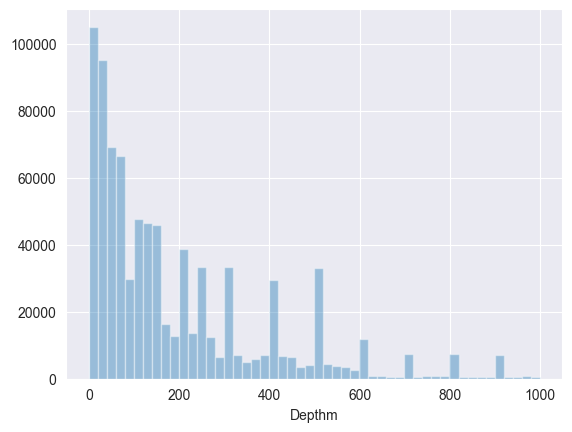

In [52]:
# Distplot after limiting.
sns.distplot(sub1["Depthm"], kde=False);

In [53]:
# Split depth into 3 categories, shallow, middle, and deep.
sub1["DEPTH_CAT"] = pd.cut(sub1["Depthm"], [0, 200, 400, 600, 1000], labels=["shallow", "kinda shallow", "kinda deep", "deep"])
sub1["DEPTH_CAT"].value_counts(sort=False)

DEPTH_CAT
shallow          529513
kinda shallow    161323
kinda deep        81459
deep              33627
Name: count, dtype: int64

In [54]:
# Create a new subset containing only the required variables and drop nan values.
sub2 = sub1[["SiO3uM", "DEPTH_CAT"]].dropna()

# Box Plot

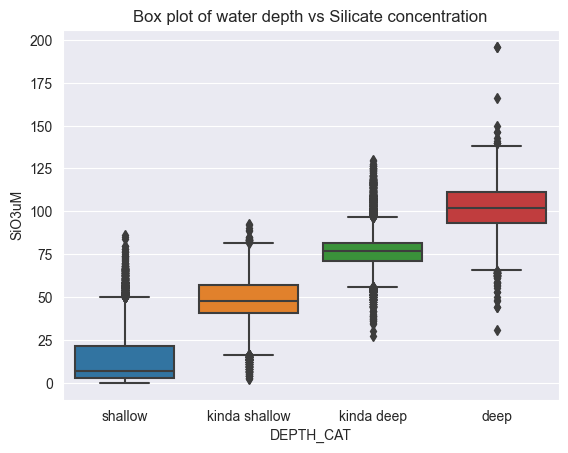

In [55]:
# Plot Silicate concentration vs water depth to visualize relationship.
# The graph shows an increasing relationship between depth and Silicate concentration.
%matplotlib inline

sns.boxplot(x="DEPTH_CAT", y="SiO3uM", data=sub2)
plt.xlabel("DEPTH_CAT")
plt.ylabel("SiO3uM")
plt.title("Box plot of water depth vs Silicate concentration");

# ANOVA

In [56]:
# Perform ANOVA variance test between water depth and Silicate concentration.
# R-squared: 0.799
# F-statistic: 4.479e+05
# p-value: 0.0
# p-value is < 0.05, so we reject the null hypothesis.
model1 = smf.ols(formula='SiO3uM ~ C(DEPTH_CAT)', data=sub2).fit()
print (model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 SiO3uM   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                 4.479e+05
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:46:26   Log-Likelihood:            -1.3021e+06
No. Observations:              337725   AIC:                         2.604e+06
Df Residuals:                  337721   BIC:                         2.604e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [57]:
print ('means for SiO3µM by depth category:')
m2 = sub2.groupby('DEPTH_CAT').mean()
print (m2)

means for SiO3µM by depth category:
                  SiO3uM
DEPTH_CAT               
shallow        12.460418
kinda shallow  48.673586
kinda deep     76.594739
deep          102.190119


In [60]:
print ('std for SiO3µM by depth category:')
m2 = sub2.groupby('DEPTH_CAT').std()
print (m2)

std for SiO3µM by depth category:
                 SiO3uM
DEPTH_CAT              
shallow       11.771988
kinda shallow 11.207970
kinda deep     8.657754
deep          14.099362


In [59]:
# Perform Tukey post hoc test to analyze differences between categories.
# New p-value: 0.05 / 6 = 0.0083
mc1 = multi.MultiComparison(sub2['SiO3uM'], sub2['DEPTH_CAT'])
res1 = mc1.tukeyhsd()
print(res1.summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj  lower    upper   reject
-------------------------------------------------------------------
         deep    kinda deep -25.5954   0.0 -26.1349 -25.0559   True
         deep kinda shallow -53.5165   0.0 -54.0413 -52.9917   True
         deep       shallow -89.7297   0.0  -90.246 -89.2134   True
   kinda deep kinda shallow -27.9212   0.0  -28.123 -27.7193   True
   kinda deep       shallow -64.1343   0.0 -64.3129 -63.9558   True
kinda shallow       shallow -36.2132   0.0 -36.3405 -36.0858   True
-------------------------------------------------------------------
